In [1]:
# Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read Data
ap_df = pd.read_csv("/Users/juan/Documents/Juan's MacBook Pro/CUNEF/Quinto/Analisis Predictivo/HW01/aapl.csv",sep=';', decimal=",")
# ap_df['Fecha'] = pd.to_datetime(ap_df['fecha'],format="%m/%d/%Y")
# ap_df = ap_df.set_index('Trimeste')
# del ap_df['fecha']

ap_df = ap_df.set_index(pd.PeriodIndex(ap_df['Trimeste'].str[-4:] + ap_df['Trimeste'].str[:2], freq='Q-Sep')
                .to_timestamp(how='e'))
# print(ap_df.head())
# ap_df.shape


In [3]:
ap_ts=ap_df[["Ingresos"]].resample("q").last()
ap_ts.drop(ap_ts.tail(1).index,inplace=True) 
# ap_ts.shape

In [4]:
# pd.set_option('display.max_rows', 130)
# print(ap_ts)

In [5]:
# ap_ts[ap_ts.index.duplicated()]

In [6]:
# ap_ts[ap_ts['Ingresos'].isna()]

In [7]:
# ap_ts["2005":'2005']

In [8]:
ap_ts.loc["2005-09-30",'Ingresos'] = 3680 #after looking up the value on 
# https://www.apple.com/newsroom/2005/10/11Apple-Reports-Fourth-Quarter-Results/#:~:text=CUPERTINO%2C%20California%E2%80%94October%2011%2C,50%20per%20diluted%20share.

In [9]:
# ap_ts["2005":'2005']

In [10]:
ap_ts_q=ap_ts['Ingresos'].astype('float64').to_period('Q-SEP').sort_index()
# ap_ts_q.head()

# ¿Los ingresos de Apple son estacionarios? ¿En media? ¿En varianza?

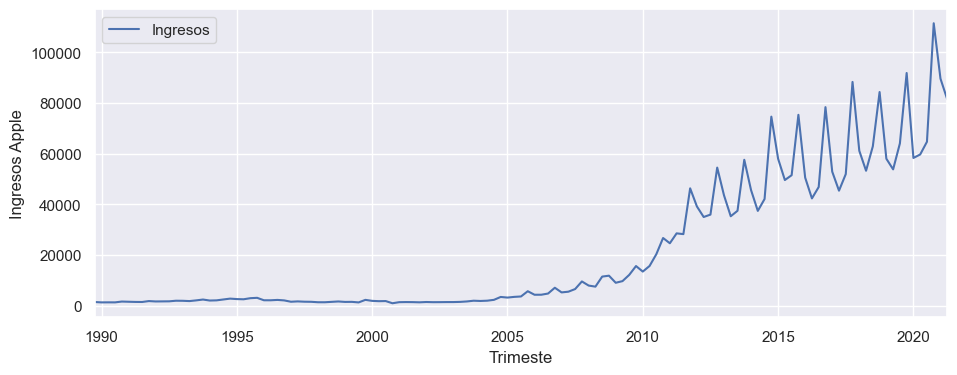

In [11]:
sns.set(rc={'figure.figsize':(11, 4)})
ax = ap_ts.plot(marker='', linestyle='-')
ax.set_ylabel('Ingresos Apple');

Se puede obsevar que ni la media ni la varianza de los ingresos son constantes en el tiempo. A medida que avanza el tiempo la media incremeneta y tambien lo hace la volatilidad de los ingresos (la varianza) por lo que los ingresos de Apple no son estacionarios.

# ¿Cuál es su tendencia? ¿y su componente estacional?

Tras observar la etacionariedad de los ingresos, concluimos que estos tienen una tendencia creciente, ya que en la mayoria de los años, los resultados son mejores que los del año previo. <br>
A continuacion se observa el comportamiento estacional de los ingresos de Apple:

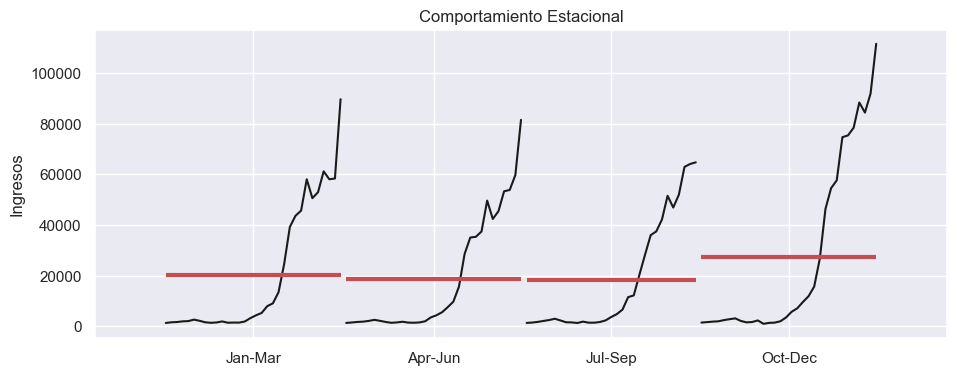

In [12]:
ax = plt.gca()
sm.graphics.tsa.quarter_plot(ap_ts['Ingresos'],ax=ax, ylabel="Ingresos")
ax.set_title('Comportamiento Estacional')
ax.set_xticklabels(["Jan-Mar","Apr-Jun","Jul-Sep","Oct-Dec"]);

Podemos observar, que de media, el triemstrse con mayores ingresos es el de septiembre a diciembre, que en el año fiscal de apple es el Q1. A que a medida que pasa el año los ingresos medios van bajando hasta llegar de nuevo al primer trimestre. Este comportamiento se debe a Apple saca los nuevos modelos de iPhone (su mayor fuente de ingrasos) justo antes del Q1 por lo que el impulso en ventas coincide con la novedad de productos. Además, es justo a tiempo para poder comprarlos en Navidad como regalo.

# ¿Cuales son las ventas anuales de Apple?

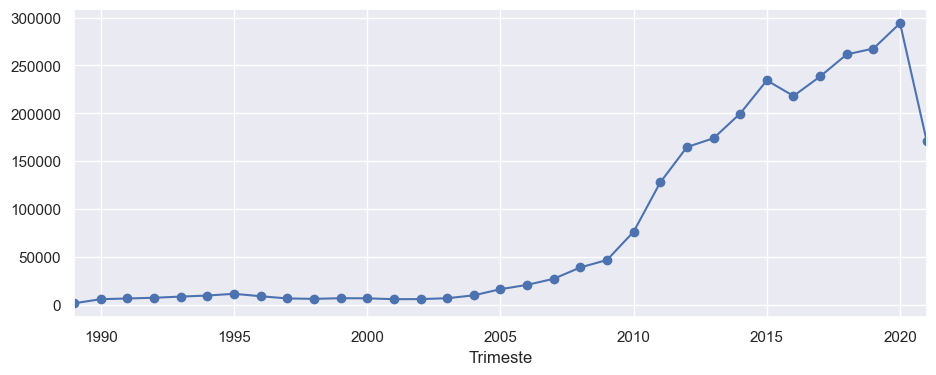

In [13]:
ap_an = ap_ts_q.resample("y").sum()
ap_an.plot(marker = "o");

A lo largo de los años se observa una tendencia creciente, pero no es hasa la segunda mitad de los 2000 que hay un punto de inflexion en ingresos. Esto puede ser debido a la expansión del iPod y la introducción del iPhone, los dos productos de Apple que más han revolucionado el mercado. Esto, jusnto con la constante inovacion e introduccion de nuevos modelos cada año catapulta las ventas entre 2010 y 2020.

# ¿Cuales son los crecimientos anuales de los ingresos?

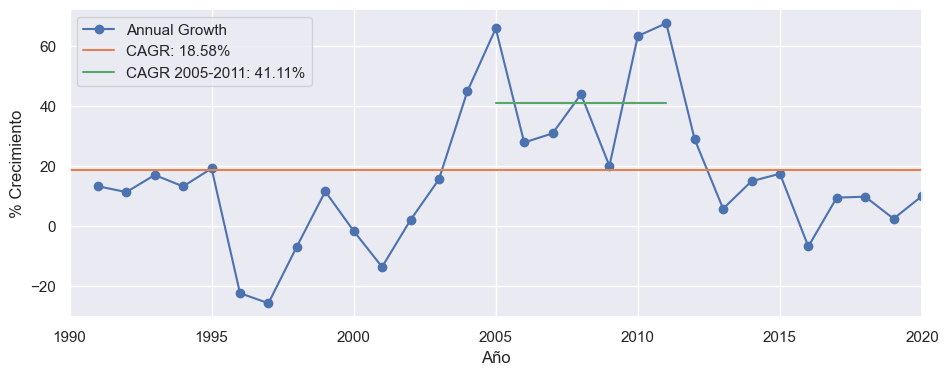

In [14]:
an_gr = pd.DataFrame(ap_an['1990':'2020'].pct_change()*100)
CAGR = (ap_an.loc["2020"]/ap_an.loc["1989"])**(1/(len(ap_an)-2))-1
CAGR05_10 = (ap_an.loc["2011"]/ap_an.loc["2005"])**(1/6)-1
an_gr["CAGR"] = CAGR*100
an_gr.loc['2005':'2011',"CAGR05_10"]= CAGR05_10*100

# better control over ax
fig, ax = plt.subplots(1, 1)
an_gr["Ingresos"].plot(ax=ax, marker = "o", label = "Annual Growth")
an_gr["CAGR"].plot(ax=ax, label = ("CAGR: " + str(round(CAGR*100,2)) + "%"))
an_gr["CAGR05_10"].plot(ax=ax, label = ("CAGR 2005-2011: " + str(round(CAGR05_10*100,2)) + "%"))
ax.legend(loc="upper right")
ax.set_ylabel("% Crecimiento")
ax.set_xlabel("Año")
ax.legend(loc='upper left');
# ts_fm.plot(ax=ax)

Gracias al grafico superior, podemos observar el crecimiento anual tanto YoY como el CAGR de todo el periodo. Desde 1989, Apple ha decrecido en ingresos YoY solo en 6 ocasiones de la cuales 5 fueron entre 1996 y 2001, que coincide justo cuando Steve Jobs regresa a Apple para reestructurar la estrategia de la empresa. <br> Analizando el CAGR de todo el periodo, vemos que de media el crecimiento de apple ha sido de un 18.6%, esto significa que cada 4 años de media, apple dobla sus ingresos. <br> Como observabamos antes, el periodo entre 2005 y 2011 fue el de mayor crecimiento YoY con un CAGR de 41.1%, una cifra que para una epresa siginficaría un gran año, Apple la mantuvo de media durante varios años seguidos.

# ¿Qué modelo predice mejor?

In [15]:
from sktime.transformations.series.boxcox import LogTransformer
from sktime.utils.plotting import plot_correlations
from sktime.utils.plotting import plot_series
from sktime.transformations.series.difference import Differencer

In [16]:
# Apply Log Transformer

transformer = LogTransformer()
log_ap_ts= transformer.fit_transform(ap_ts_q)

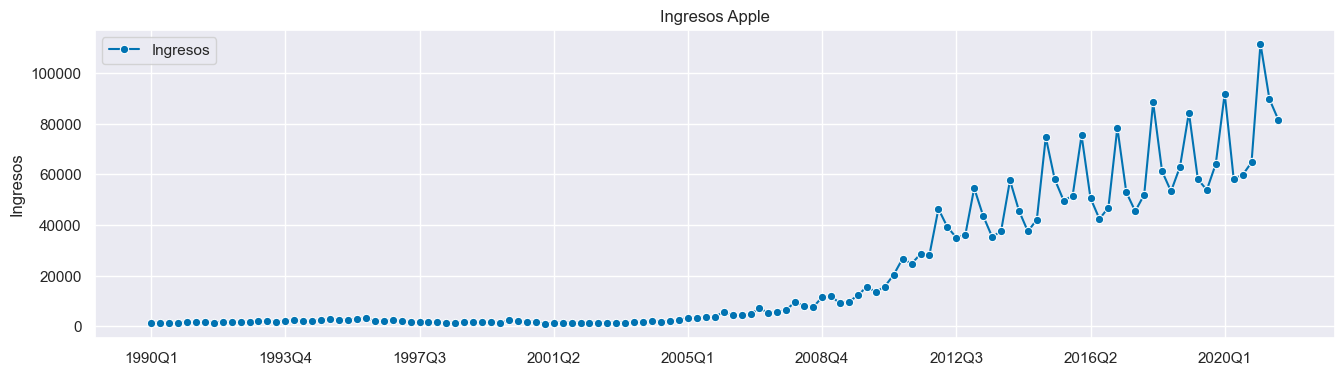

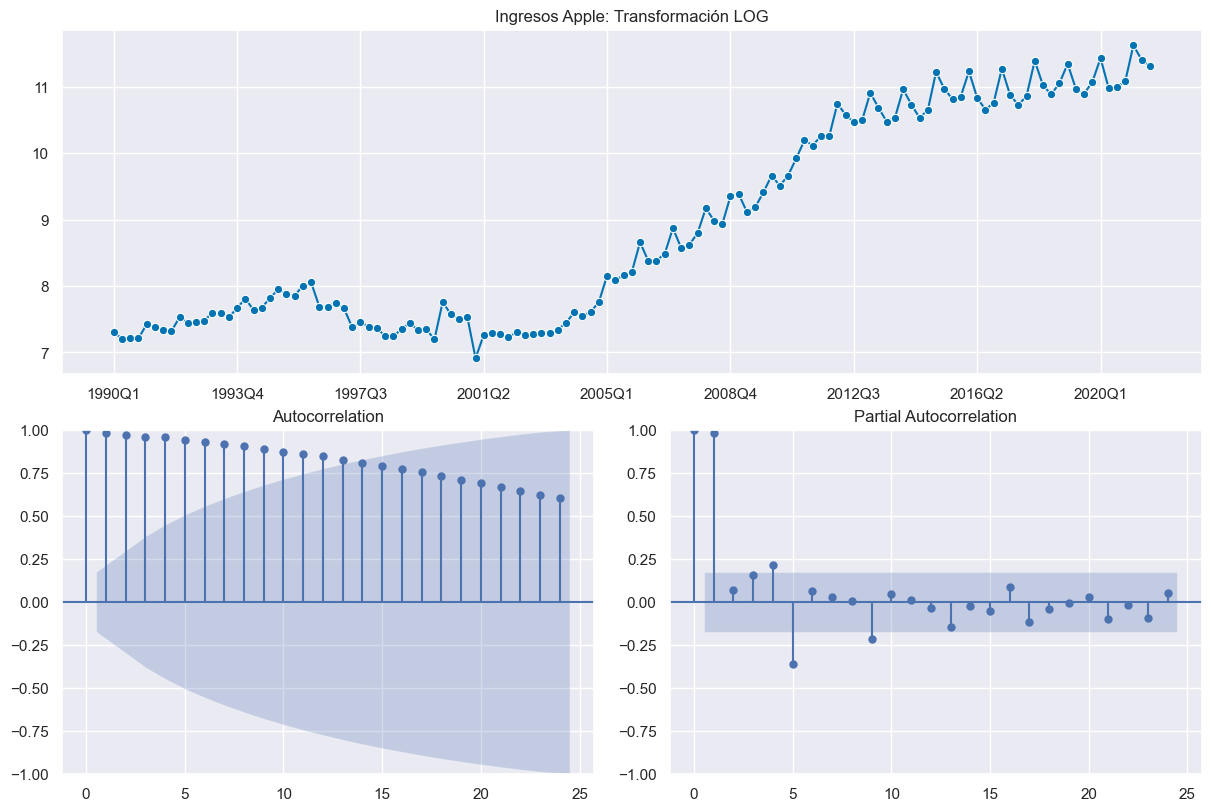

In [17]:
# Plot Log Data & Original Data
fig, ax =plot_series(ap_ts_q, labels=["Ingresos"])
ax.set_title('Ingresos Apple')
plot_correlations(log_ap_ts, series_title = "Ingresos Apple: Transformación LOG");

Antes de entrenar ningun modelo, tenemos que lidiar con la estacionariedad de lo ingresos de Apple, para ello el primer paso es tomar el logaritmo de cada valor para reducir la varianza en los datos. Como vemos en el diagrama superior, cuando se toma el logaritmo, el rango de valores se minimiza bastante, aunque sigue habiendo falta de estacionariedad en la media y autocorrelacion en los ingresos.

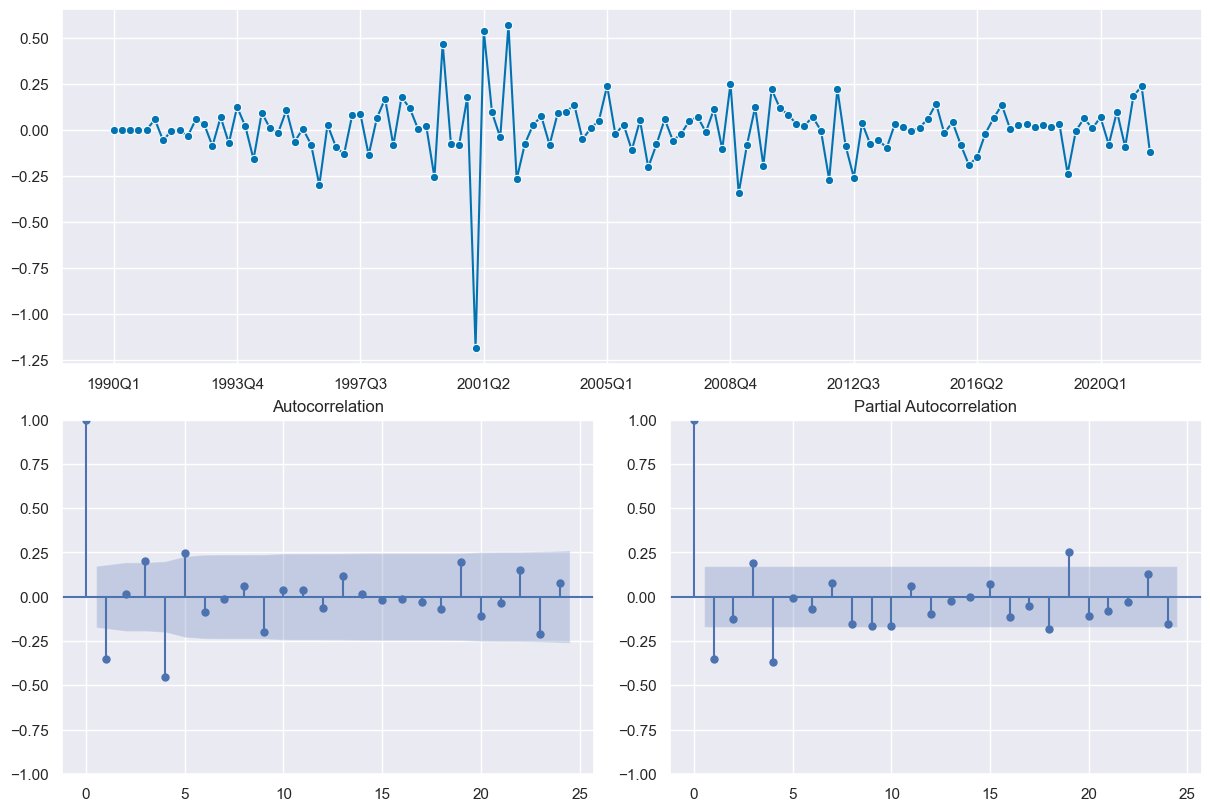

In [18]:
# Autocorrelation Fuction
# d=1; D=0; S=4
# 
transf_diff=Differencer(lags=[1,4])
plot_correlations(transf_diff.fit_transform(log_ap_ts));

Si hacemos las diferencias entre valores siguiendo unos lags 1,4 conseguimos que la gran mayoria de las autocorrelaciones y autocorrelaciones parciales queden dentro del umbral de confianza, lo que nos ayuda a la hora de escoger los vlaores AR y MA del modelo SARIMA. 

In [19]:
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.model_selection import temporal_train_test_split

In [20]:
# Select Train & test sample

y_train, y_test = temporal_train_test_split(y =ap_ts_q, test_size=8)
log_y_train, log_y_test = temporal_train_test_split(y =log_ap_ts, test_size=8)

# Time Series Size
# print(y_train.shape[0], y_test.shape[0])

In [21]:
# Forecast Horizon
fh = np.arange(len(y_test)) + 1  # forecasting horizon

In [22]:
### ARIMA MODEL

In [23]:
# Sktime Auto ARIMA Function
from sktime.forecasting.arima import AutoARIMA
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error
from sktime.performance_metrics.forecasting import MeanSquaredError
from sktime.forecasting.ets import AutoETS

In [24]:
ap_arima = AutoARIMA(sp=4,suppress_warnings=True)
ap_arima.fit(log_y_train);

In [25]:
# ap_arima.get_fitted_params()

In [26]:
#  Auto ARIMA Model Summary
arimavals = pd.DataFrame(ap_arima.get_fitted_params().items(), columns = ["Parameter", "Value"])[4:6]
print(arimavals.to_string(index=False))

     Parameter        Value
         order    (0, 1, 1)
seasonal_order (1, 0, 1, 4)


Estos son los parametros del modelo SARIMA con mejor puntuacion. Este modelo tiene 0 retardos, esta integrado 1 vez, y coge 1 error para la media movil. Ademas, se detecta un orden estacional de 4 trimestres (1 año), el cual se modela usando 1 retardo y 1 error pasado para la autorrelacion y media movil.

In [27]:
results = pd.DataFrame(ap_arima.get_fitted_params().items(), columns = ["Parameter", "Value_ARIMA"])[6:]

In [28]:
#  Auto ARIMA Forecast
log_y_pred = ap_arima.predict(fh)

In [29]:
#  Auto ARIMA Forecast
# Original Time series (Invert log transformation)
y_pred_arima = np.exp(log_y_pred)

In [30]:
# Forecast Accuracy
# MAPE
mape_arima = mean_absolute_percentage_error(log_y_test, log_y_pred)

In [31]:
# Forecast Accuracy
#Mean Squared Error
rmse = MeanSquaredError(square_root=True)
rmse_log_arima = rmse(log_y_test, log_y_pred)

In [32]:
# Forecast Accuracy
#Mean Squared Error
rmse_arima = rmse(y_test, y_pred_arima)
new_row = {"Parameter" : "rmse", "Value_ARIMA" : rmse_arima}
results = results.append(new_row, ignore_index=True)

In [33]:
### ETS MODEL

In [34]:
# Specifying the forecasting algorithm
ap_ets = AutoETS(auto=True, sp=4, n_jobs=-1)

In [35]:
ap_ets.fit(y_train);

In [36]:
# step 5: querying predictions
y_pred_ets = ap_ets.predict(fh)

Debido a que he elegido el modelo ARIMA como mejor modelo, de aqui en adelante solo usaremos este modelo para culquier tipo de prediccion o analisis.

El modelo ETS escogido es de tipo MAM, es decir que el error es multiplicativo, la tendencia es additiva y la estacionalidad es multiplicativa. <br>

A continuacion vemos los resultados de cada modelo:

In [37]:
ets_res = dict(ap_ets.get_fitted_params().items())
ets_res["rmse"] = rmse(y_test, y_pred_ets)
results['Values_ETS'] = results['Parameter'].map(ets_res)
print(results.to_string(index=False))

Parameter   Value_ARIMA   Values_ETS
      aic   -108.732607  1956.039109
     aicc   -108.378625  1958.076146
      bic    -97.649868  1983.830344
     hqic   -104.232688  1967.324252
     rmse  16021.472507 17824.622867


Observamos que en todas las metricas de prediccion, obtiene un mejor resultado el modelo ARIMA que el de ETS tanto en error cuadratico medio como en el AIC, BIC y similares. Debido a estas metricas consideramo el ARIMA mejor modelo en este caso. <br>
De todos modos graficamos las predicciones para los datos de test de ambos modelos:

In [38]:
ap_pred_ints = np.exp(ap_arima.predict_interval(fh, coverage=0.9))

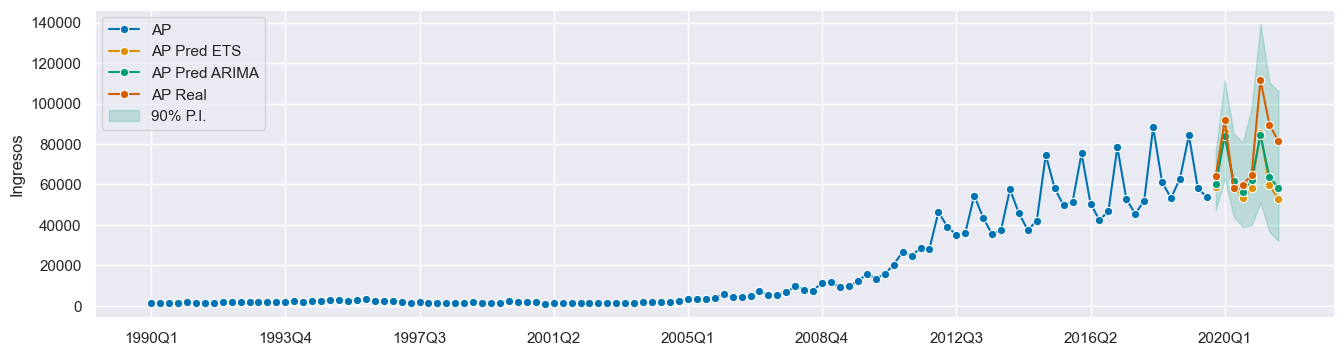

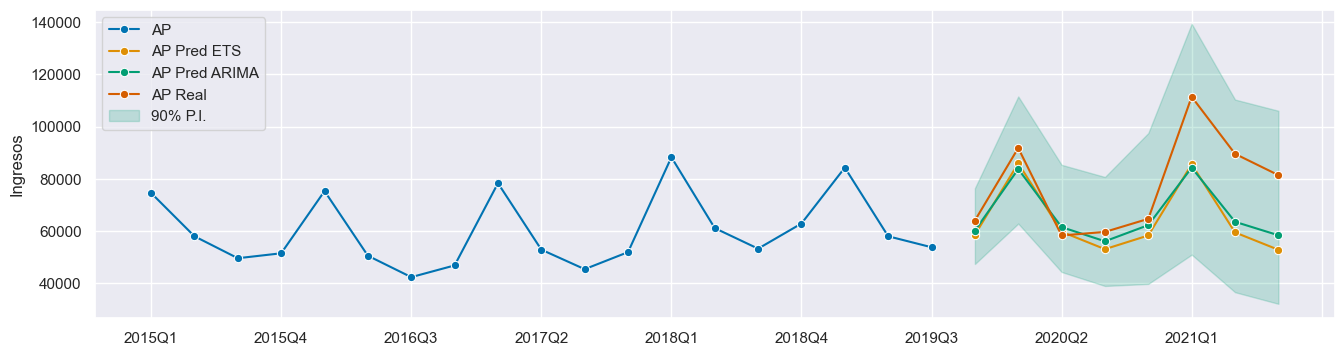

In [39]:
fig, ax = plot_series(y_train, y_pred_ets, y_pred_arima , y_test, 
            labels=["AP", "AP Pred ETS", "AP Pred ARIMA",  "AP Real"])
ax.fill_between(
    ax.get_lines()[-2].get_xdata(),
    ap_pred_ints[('Coverage', 0.9, 'lower')],
    ap_pred_ints[('Coverage', 0.9, 'upper')],
    alpha=0.2,
    color=ax.get_lines()[-2].get_c(),
    label="90% P.I.",
)
ax.legend(loc='upper left')

fig, ax = plot_series(y_train["2015Q1":], y_pred_ets, y_pred_arima , y_test, 
            labels=["AP", "AP Pred ETS", "AP Pred ARIMA",  "AP Real"]);
ax.fill_between(
    ax.get_lines()[-2].get_xdata(),
    ap_pred_ints[('Coverage', 0.9, 'lower')],
    ap_pred_ints[('Coverage', 0.9, 'upper')],
    alpha=0.2,
    color=ax.get_lines()[-2].get_c(),
    label="90% P.I.",
)
ax.legend(loc='upper left');

Vemos que a pesar de que en la tabla fuera mucho mejor el modelo ARIMA que el ETS, al graficarlo no parece haber tanta disparidad entre ellos. Ambos son capazes de predecir con gran precision los valores de ingresos hasta 2021Q1 donde se ve que Apple tiene ingresos extraordinarios. Sin embargo, la tendencia para los triemestres sguientes la predicen bien ambos modelos pero se siguen quedando por debajo.

# ¿Existe efecto COVID? Cuantificar.

In [77]:
covid = pd.DataFrame({"Ingresos Reales" : y_test, "Ingresos Estimados" : y_pred_arima})["2020Q1":"2021Q1"]
covid["Efecto Covid abs"] =  covid["Ingresos Reales"] - covid["Ingresos Estimados"]
covid["Efecto Covid %"] = round(covid["Efecto Covid abs"]/covid["Ingresos Reales"],2)*100
print(covid)

        Ingresos Reales  Ingresos Estimados  Efecto Covid abs  Efecto Covid %
2020Q1          91819.0        83759.634139       8059.365861             9.0
2020Q2          58313.0        61526.907310      -3213.907310            -6.0
2020Q3          59685.0        56095.038238       3589.961762             6.0
2020Q4          64698.0        62284.321502       2413.678498             4.0
2021Q1         111439.0        84299.051116      27139.948884            24.0


La diferencia entre el valor estimado y el valor real en los ingresos durante el COVID se puede achacar a al efecto que la pandemia tuvo sobre ventas, sin embrago, como se ve en la tabla, durante el 2020 ninguna estimacion se desvia del 10% en terminos relativos, por lo que, a diferencia del caso que vimos con Coca-Cola, el COVID no tuvo un impacto significativo en los ingresos de Apple. <br>
Sin embargo, donde se ve una clara diferencia es en 2021Q1, es decir, en el ultimo trimestre natrual de 2020. Los ingresos extraordianrios batieron records en Apple tras ser mayores a $1B por primera vez en su historia. Esto hace que la prediccion fallara por un 24%. Sin embargo, este valor se puede explicar por la nueva ola de teletrabajo en todo el mundo, al establecerse como nueva forma de trabajo, hubo mucha inversion en tecnología (iPhones, Macs, etc) lo que supuso un trimestre excpcional para Apple.

# ¿Cuales son las ventas acumuladas para el año 2021? ¿Y para el 2022? 


In [41]:
ap_arima_exp = AutoARIMA(sp=4,suppress_warnings=True)
ap_arima_exp.fit(log_ap_ts);

In [42]:
fh_exp = np.arange(6) + 1

In [43]:
ap_ets_exp = AutoETS(auto=True, sp=4, n_jobs=-1)
ap_ets.fit(ap_ts_q);

In [44]:
log_y_pred_exp = ap_arima_exp.predict(fh_exp)
y_pred_arima_exp = np.exp(log_y_pred_exp)
ap_pred_ints_exp = np.exp(ap_arima_exp.predict_interval(fh_exp, coverage=0.9))


y_pred_ets_exp = ap_ets.predict(fh_exp)

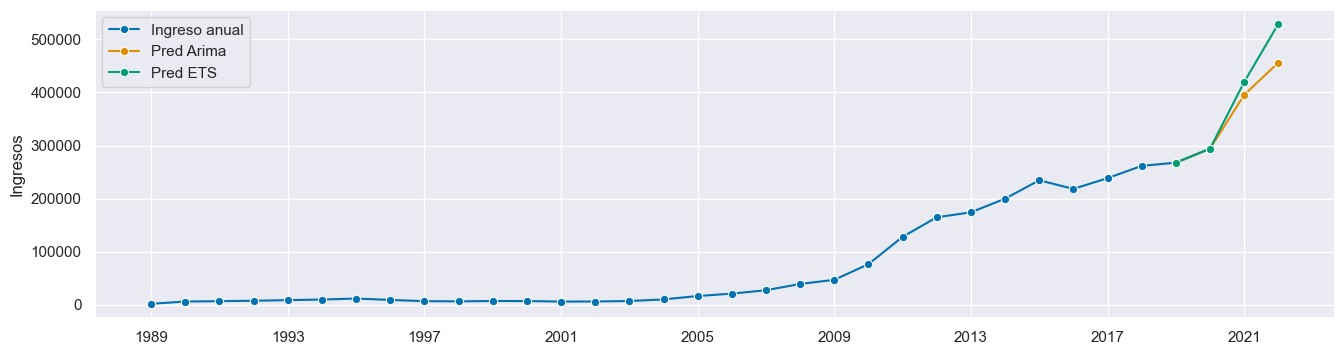

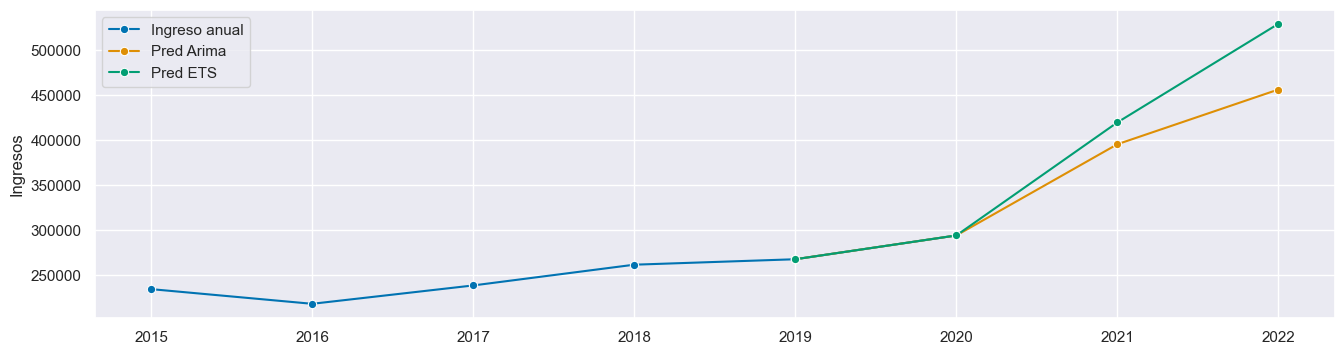

In [46]:
ap_concat_arima = pd.concat([ap_ts_q, y_pred_arima_exp])
ap_an_arima = ap_concat_arima.resample("y").sum() 

ap_concat_ets = pd.concat([ap_ts_q, y_pred_ets_exp])
ap_an_ets = ap_concat_ets.resample("y").sum() 

fig, ax = plot_series(ap_an[:"2020"],ap_an_arima["2019":], ap_an_ets["2019":], 
                      labels=["Ingreso anual", "Pred Arima", "Pred ETS"])

fig, ax = plot_series(ap_an["2015":"2020"],ap_an_arima["2019":], ap_an_ets["2019":], 
                      labels=["Ingreso anual", "Pred Arima", "Pred ETS"]);

Tras predecir los ingresos para el resto de 2021 y todo el 2022 vemos que la estimacion continúa la tendencia creciente con ingresos anuales de 395582.0 y 456445.0 respectivamente para el modelo ARIMA y 419853.0 y 529525.0 respectivamente para el modelo ETS. 
Las estimaciones del modelo ETS son mas agresivas que las del modelo ARIMA. Son mas razonables las estimaciones ARIMA, no solo porque, como ya hemos visto, es mejor estimador, si no tambien porque si los ingresos de 2021Q1 eran extraordinarios, es normal que en trimestres posteriores este crecimiento decelere.

Nota: En el grafico se observa que las estimaciones se solapan con los ingresos verdaderos debido a que la funcion sktime.plot_series() hace un scatterplot en vez de un lineplot si los valores de las series son inferiores o iguales a 3

# ¿Son creíbles las predicciones del Barclays?

La unica informacion que tenemos de Barclays sobre Apple son sus predicciones de EPS (beneficios por accion). En este analisis sin embargo estamos trabajando con los ingresos. Asi que para comparar entre ambos vamos a fijarnos en los crecimientos YoY y asumir que los gastos incurridos entres los ingresos y beneficios son proporcionales.
<br>
Segun Barclays, el crecimiento de Apple en 2021 y 2022 sera el siguiente:

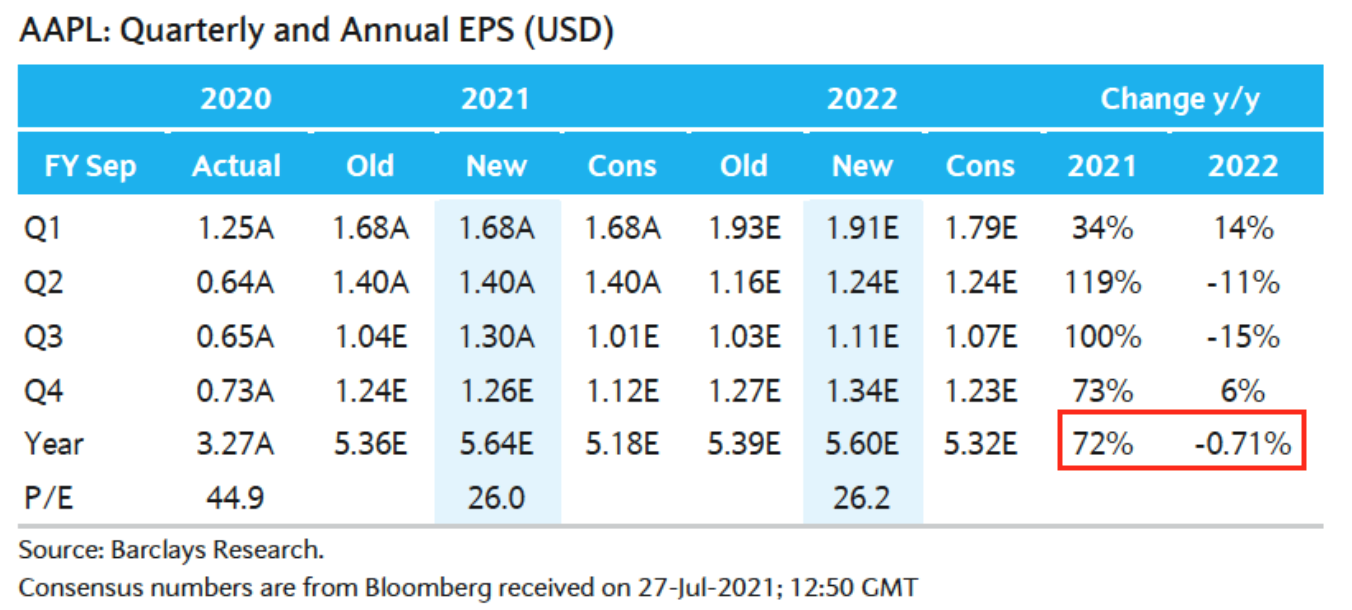

In [89]:
from IPython.display import Image
a = Image( filename= "/Users/juan/Documents/Juan's MacBook Pro/CUNEF/Quinto/Analisis Predictivo/HW01/Barclays.png",
      width=500, height=500, embed = True)
a


Por otro lado, el crecimiento porcentual calculado por nuestros modelos para 2021 y 2022 es el siguiente:

In [76]:
print(pd.DataFrame({"ARIMA":round(ap_an_arima['2019':'2022'].pct_change()*100,2),
              "ETS":round(ap_an_ets['2019':'2022'].pct_change()*100,2)}
             )['2021':'2022'])

      ARIMA    ETS
2021  34.49  42.74
2022  15.39  26.12


Podemos observar que tanto Barclays como nuestros modelos sugieren que Apple tendrá un crecimiento extraordinario en 2021 y que en 2022 el crecimiento sera mucho menor. Sin embargo, el modelo de Barclays es mucho mas agresivo para 2021 pero mucho mas conservador en 2022. <br>
Esto se puede deber principalmente a que el modelo de Barclays esta teniendo en cuenta factores exogenos a los valores historicos de Apple, los cuales incluyen la gran demanda tecnologica prevista en 2021 y la escasez de materia prima que retrasara la produccion y creara dificultades a la hora de satisfacer la demanda tanto para el final de 2021 como para todo el 2022 prediciendo así que Apple no crezca este año.